In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results/accuracy.csv', index_col=None)
df.tail()

,world file,detector,distance
30,medium-field-medium-explored,Convolutional-(64x64),9790.324938
31,medium-field-medium-explored,Convolutional-(128x128),13020.500583
32,medium-field-medium-explored,Simple,732.769383
33,medium-field-medium-explored,ExpandingWavefront,607.548294
34,medium-field-medium-explored,NaiveActiveArea,44568.677979


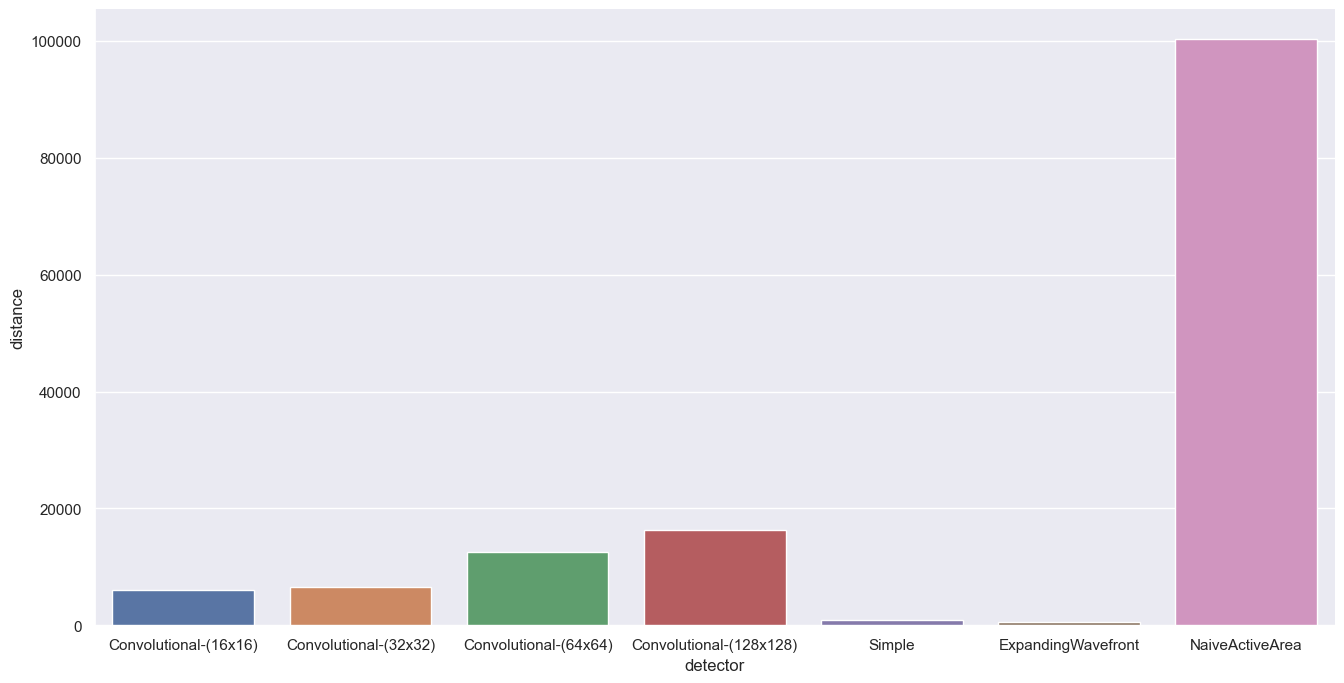

In [3]:
df_star = df[df['world file'] == 'large-field-medium-explored']

sns.set(rc={"figure.figsize": (16, 8)})
sns.barplot(x='detector', y='distance', data=df_star)
sns.despine(bottom=True)
plt.show()